In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import os
from astropy import units as u
from astropy.coordinates import SkyCoord
import traceback
from dataclasses import make_dataclass

from data import get_star_data_df

In [2]:
stars = get_star_data_df()

In [38]:
near = 0.1
far = 1
fov = 70
aspect = 1

S = 1 / np.tan(np.deg2rad(fov/2))
b = (far+near) / (near - far)
c  = (2*far*near) / (near - far)


projection = np.array([
        [S,0,0,0],
        [0,S/aspect,0,0],
        [0,0,b,c],
        [0,0,-1,0],
    ])

def get_values(coord):
    return [coord.cartesian.x, coord.cartesian.y, coord.cartesian.z, 1]

series = stars.coord.apply(get_values)
positions = np.array(series.tolist())
positions[:3]

array([[ 0.70409407,  0.01587055,  0.70992934,  1.        ],
       [ 0.99971743,  0.02209031, -0.00877986,  1.        ],
       [ 0.99477298,  0.02316084, -0.09945   ,  1.        ]])

In [39]:
result = positions@projection
result_df = pd.DataFrame(result)

result_df["x"] = result_df[0] / result_df[3]
result_df["y"] = result_df[1] / result_df[3]
result_df["z"] = result_df[2] / result_df[3]

result_df.head(3)

,0,1,2,3,x,y,z
0,1.005551,0.022665,-1.867691,-0.157762,-6.373842,-0.143669,11.838659
1,1.427744,0.031548,-0.989269,0.001951,731.771105,16.169620,-507.036474
2,1.420683,0.033077,-0.878450,0.022100,64.284300,1.496701,-39.748868


In [40]:
in_frame = ((result_df["z"] > -1) & (result_df["z"] < 1)) & ((result_df["x"] > -1) & (result_df["x"] < 1)) & ((result_df["y"] > -1) & (result_df["y"] < 1))
visible = result_df[in_frame]
print(result_df.size)
print(visible.size)

63595
469


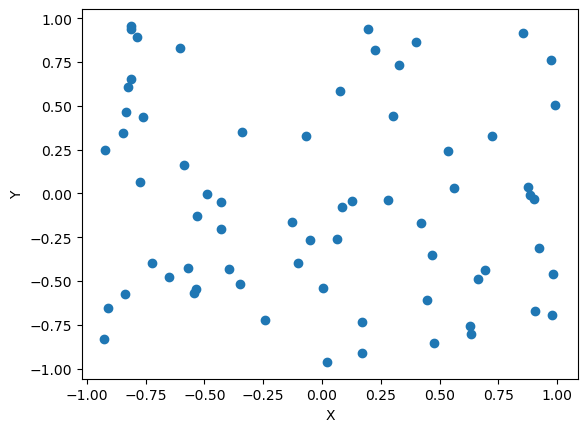

In [41]:
plt.scatter(x=visible["x"], y=visible["y"])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

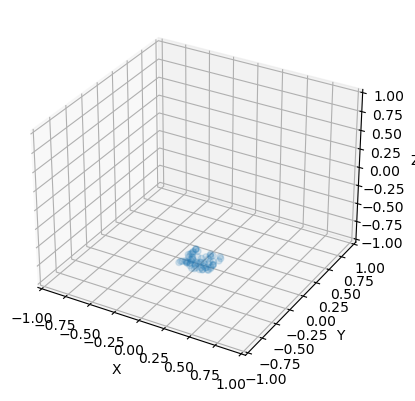

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

test_df = pd.DataFrame(positions)
test_df = test_df[in_frame]
# Plot the points
ax.scatter(test_df[0], test_df[1], test_df[2], alpha=0.15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()